<a href="https://colab.research.google.com/github/Korey01/Korey01/blob/main/Customer_Segmentation_thelook_eCommerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project below is a customer segmentation project using thelook_eCommerce Dataset which is public data hosted in Google [BigQuery](https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce?hl=en-GB&project=korry-big-query-project) and is included in BigQuery's 1TB/mo of free tier processing. ETL was performed using SQL as the data wass contained in a relational database, and for the sake of easy access, the extracted data has been saved as a csv file for further analysis.

**Dataset Description**
The data source [thelook_eCommerce Dataset]((https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce?hl=en-GB&project=korry-big-query-project) is is a data set containing 7 tables with the following titles and features/columns

1. distribution_centers (id, name, latitude, longitude)
2. events (id,user_id, sequence_number, session_id,created_at, ip_address,city, state, postal_code, browser,  traffic_source, event_type)
3. inventory_items (id, product_id, created_at, sold_at, cost, product_category, product_name, product_brand, product_retail_price, product_department, product_sku, product_distribution)
4. order_items (Row, id,order_id, user_id, product_id, inventory_item_id, status, created_at, shipped_at, delivered_at, returned_at, sale_price )
5. orders (order_id, user_id, status, gender, created_at, returned_at, shipped_at, delivered_at, num_of_item )
6. products (id, cost, category name, brand retail_price, department, sku, distribution_cen)
7. users (id, first_name, last_name, email, age, gender, state, street_address, postal_code, city, country, latitude, longitude, traffic_source, created_at)

TheLook is a fictitious eCommerce clothing site developed by the Looker team. The contents of this dataset are synthetic, and are provided to industry practitioners for the purpose of product discovery, testing, and evaluation

The intent of the analysis in this notebook is to create a customer segmentation model necessary for  understanding the patterns in the data  and drawing insights that can aid better decision making for the fictitious eCommerce business.

# Extract, transform and Load

In [1]:
#Authenticating with google cloud.
from google.colab import auth
auth.authenticate_user()

In [2]:
# Import relevant libraries/packages for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the bigguery module from google.cloud
from google.cloud import bigquery

In [4]:
#create a variable to hid the bigquery project id that we will be extracting data from.
project_id = "korry-big-query-project"

In [5]:
# Create a BigQuery client object
client = bigquery.Client(project=project_id)

# Define your SQL query
query = """
SELECT u.id, u.first_name, u.last_name, u.age, u.gender, u.city, u.country, u.traffic_source,
       p.id AS product_id, p.name AS product_name, p.brand, o.num_of_item,o.created_at,o.shipped_at,
       o.returned_at, o.user_id,o.order_id, d.name as distribution_center_name, p.cost, p.retail_price,oi.delivered_at, o.status
FROM `bigquery-public-data.thelook_ecommerce.users` AS u
JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o ON u.ID = o.user_id
JOIN `bigquery-public-data.thelook_ecommerce.products` AS p ON o.order_id = p.id
JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` AS d ON p.distribution_center_id = d.id
JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS oi ON o.order_id = oi.order_id;
"""

# Run the query
query_job = client.query(query)

# Convert the result into a DataFrame
df = query_job.to_dataframe()



In [6]:
# Show the first 5 rows of the DataFrame
df.head(5)

,id,first_name,last_name,age,gender,city,country,traffic_source,product_id,product_name,...,created_at,shipped_at,returned_at,user_id,order_id,distribution_center_name,cost,retail_price,delivered_at,status
0,4560,Lisa,Phillips,36,F,Rio Branco,Brasil,Search,5807,Women's Legging - Nude,...,2021-08-22 17:02:00+00:00,NaT,NaT,4560,5807,Chicago IL,5.42370,8.95,NaT,Processing
1,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9262,Ozone Women's Mid Zone 2 Pack,...,2024-05-16 18:43:00+00:00,NaT,NaT,7272,9262,New Orleans LA,6.06200,14.00,NaT,Cancelled
2,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9262,Ozone Women's Mid Zone 2 Pack,...,2024-05-16 18:43:00+00:00,NaT,NaT,7272,9262,New Orleans LA,6.06200,14.00,NaT,Cancelled
3,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9260,Bulldog Cotton Puppy Dog Breed Animal Socks 9-11,...,2023-09-08 18:43:00+00:00,2023-09-11 17:56:00+00:00,2023-09-17 10:13:00+00:00,7272,9260,Philadelphia PA,5.34418,13.99,2023-09-15 02:53:00+00:00,Returned
4,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9261,B.ella Women's Dharma Extra Fine Merino Wool F...,...,2023-05-20 18:43:00+00:00,2023-05-22 20:30:00+00:00,NaT,7272,9261,Los Angeles CA,4.62910,11.90,NaT,Shipped


In [7]:
#save query result as CSV file for easy access and further analysis
df.to_csv('/content/sample_data/df.csv', index=False)

In [8]:
# read the saved csv file
df = pd.read_csv('/content/sample_data/df.csv')

In [9]:
#Check the data features including count and tyoe using the info command.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42445 entries, 0 to 42444
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        42445 non-null  int64  
 1   first_name                42445 non-null  object 
 2   last_name                 42445 non-null  object 
 3   age                       42445 non-null  int64  
 4   gender                    42445 non-null  object 
 5   city                      41975 non-null  object 
 6   country                   42445 non-null  object 
 7   traffic_source            42445 non-null  object 
 8   product_id                42445 non-null  int64  
 9   product_name              42443 non-null  object 
 10  brand                     42408 non-null  object 
 11  num_of_item               42445 non-null  int64  
 12  created_at                42445 non-null  object 
 13  shipped_at                27850 non-null  object 
 14  return

In [10]:
# check the descriptive statistics for the dataset
df.describe()

,id,age,product_id,num_of_item,user_id,order_id,cost,retail_price
count,42445.000000,42445.000000,42445.000000,42445.000000,42445.000000,42445.000000,42445.000000,42445.000000
mean,11556.670703,40.921404,14562.607256,1.913936,11556.670703,14562.607256,28.500419,59.302544
std,6734.910743,16.975411,8422.410594,1.073588,6734.910743,8422.410594,30.972415,66.706576
min,2.000000,12.000000,1.000000,1.000000,2.000000,1.000000,0.008300,0.020000
25%,5672.000000,26.000000,7239.000000,1.000000,5672.000000,7239.000000,11.248740,24.000000
50%,11505.000000,41.000000,14562.000000,2.000000,11505.000000,14562.000000,19.692000,39.990002
75%,17410.000000,56.000000,21879.000000,2.000000,17410.000000,21879.000000,34.423500,69.949997
max,23252.000000,70.000000,29120.000000,4.000000,23252.000000,29120.000000,557.151002,999.000000


In [11]:
#Check for missing data
df.isna().sum()

id                              0
first_name                      0
last_name                       0
age                             0
gender                          0
city                          470
country                         0
traffic_source                  0
product_id                      0
product_name                    2
brand                          37
num_of_item                     0
created_at                      0
shipped_at                  14595
returned_at                 38009
user_id                         0
order_id                        0
distribution_center_name        0
cost                            0
retail_price                    0
delivered_at                27351
status                          0
dtype: int64

We can see that some missing data exists, however these data needs to be treated with care as the missing values seen have implicit meanings for the analysis. For instance an empty data in returned_at would imply that the customer either did not complete their order or did not return the delivered order. The missing value will subsequently be useful for feature engineering later in the analysis.

# PREDICTIVE ANALYSIS

1. **Customer Segmentation:** Segmenting customers based on their demographic information such as age, gender, city, country, and traffic source can help in understanding customer behavior and preferences.







## Customer Segmentation

Segmenting customers based on their demographic information such as age, gender, city, country, and traffic source can help in understanding customer behavior and preferences. It can also help to identify various segments that the business can target to archive a plethora of results.

For this project we will be using K means clustering to achive customer segmentation because k-means clustering is very effective for identifying patterns in unstructured data and data where the target variable is unknown. As we are trying to identify patterns we cannot immediately notice by mere descriptive evaluation, a model that clusters data set based on the underlining patterns is necessary for segmenting these customers for insightful decision making.

In [12]:
#Create new column "Customer name" to contain the concatenatioin of the first and last name.
pd.set_option('display.max_columns', None)
df['Customer_name']= df['first_name']+ ' ' +df['last_name']
df.head()

,id,first_name,last_name,age,gender,city,country,traffic_source,product_id,product_name,brand,num_of_item,created_at,shipped_at,returned_at,user_id,order_id,distribution_center_name,cost,retail_price,delivered_at,status,Customer_name
0,4560,Lisa,Phillips,36,F,Rio Branco,Brasil,Search,5807,Women's Legging - Nude,NNW,1,2021-08-22 17:02:00+00:00,NaN,NaN,4560,5807,Chicago IL,5.42370,8.95,NaN,Processing,Lisa Phillips
1,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9262,Ozone Women's Mid Zone 2 Pack,Ozone,2,2024-05-16 18:43:00+00:00,NaN,NaN,7272,9262,New Orleans LA,6.06200,14.00,NaN,Cancelled,Matthew Wong
2,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9262,Ozone Women's Mid Zone 2 Pack,Ozone,2,2024-05-16 18:43:00+00:00,NaN,NaN,7272,9262,New Orleans LA,6.06200,14.00,NaN,Cancelled,Matthew Wong
3,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9260,Bulldog Cotton Puppy Dog Breed Animal Socks 9-11,Back to Nature,1,2023-09-08 18:43:00+00:00,2023-09-11 17:56:00+00:00,2023-09-17 10:13:00+00:00,7272,9260,Philadelphia PA,5.34418,13.99,2023-09-15 02:53:00+00:00,Returned,Matthew Wong
4,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9261,B.ella Women's Dharma Extra Fine Merino Wool F...,Bella,1,2023-05-20 18:43:00+00:00,2023-05-22 20:30:00+00:00,NaN,7272,9261,Los Angeles CA,4.62910,11.90,NaN,Shipped,Matthew Wong


In [13]:
#Create a copy of the dataframe for future reference if necessary.
df_archive = df.copy()
df_archive.head()

,id,first_name,last_name,age,gender,city,country,traffic_source,product_id,product_name,brand,num_of_item,created_at,shipped_at,returned_at,user_id,order_id,distribution_center_name,cost,retail_price,delivered_at,status,Customer_name
0,4560,Lisa,Phillips,36,F,Rio Branco,Brasil,Search,5807,Women's Legging - Nude,NNW,1,2021-08-22 17:02:00+00:00,NaN,NaN,4560,5807,Chicago IL,5.42370,8.95,NaN,Processing,Lisa Phillips
1,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9262,Ozone Women's Mid Zone 2 Pack,Ozone,2,2024-05-16 18:43:00+00:00,NaN,NaN,7272,9262,New Orleans LA,6.06200,14.00,NaN,Cancelled,Matthew Wong
2,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9262,Ozone Women's Mid Zone 2 Pack,Ozone,2,2024-05-16 18:43:00+00:00,NaN,NaN,7272,9262,New Orleans LA,6.06200,14.00,NaN,Cancelled,Matthew Wong
3,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9260,Bulldog Cotton Puppy Dog Breed Animal Socks 9-11,Back to Nature,1,2023-09-08 18:43:00+00:00,2023-09-11 17:56:00+00:00,2023-09-17 10:13:00+00:00,7272,9260,Philadelphia PA,5.34418,13.99,2023-09-15 02:53:00+00:00,Returned,Matthew Wong
4,7272,Matthew,Wong,34,M,Rio Branco,Brasil,Search,9261,B.ella Women's Dharma Extra Fine Merino Wool F...,Bella,1,2023-05-20 18:43:00+00:00,2023-05-22 20:30:00+00:00,NaN,7272,9261,Los Angeles CA,4.62910,11.90,NaN,Shipped,Matthew Wong


# DATA PREPROCESSING

In [14]:
# Convert the datetime related variables to datetime format to aid better analysis
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['shipped_at'] = pd.to_datetime(df['shipped_at'], errors='coerce')
df['returned_at'] = pd.to_datetime(df['returned_at'], errors='coerce')
df['delivered_at'] = pd.to_datetime(df['delivered_at'], errors='coerce')

# Handle missing values by filling them with Unknown. This is because deleting them all together may lead us to lose entries that may be critical to our analysis.
df['city'].fillna('Unknown', inplace=True)
df['product_name'].fillna('Unknown', inplace=True)
df['brand'].fillna('Unknown', inplace=True)

# Feature Engineering
df['order_duration'] = (df['delivered_at'] - df['created_at']).dt.days
df['is_returned'] = df['returned_at'].notna().astype(int)

In [15]:
#Chek the various information including datatype for our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42445 entries, 0 to 42444
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        42445 non-null  int64              
 1   first_name                42445 non-null  object             
 2   last_name                 42445 non-null  object             
 3   age                       42445 non-null  int64              
 4   gender                    42445 non-null  object             
 5   city                      42445 non-null  object             
 6   country                   42445 non-null  object             
 7   traffic_source            42445 non-null  object             
 8   product_id                42445 non-null  int64              
 9   product_name              42445 non-null  object             
 10  brand                     42445 non-null  object             
 11  num_of_item    

In [16]:
#Create a dataframe to hold a selection of variables necessary for our customer segmentation analysis.
CustomerSeg_df = df[['id', 'Customer_name', 'age', 'gender', 'city', 'country', 'traffic_source', 'status', 'retail_price','order_duration', 'is_returned', 'created_at']]
CustomerSeg_df.head(10)

,id,Customer_name,age,gender,city,country,traffic_source,status,retail_price,order_duration,is_returned,created_at
0,4560,Lisa Phillips,36,F,Rio Branco,Brasil,Search,Processing,8.950000,NaN,0,2021-08-22 17:02:00+00:00
1,7272,Matthew Wong,34,M,Rio Branco,Brasil,Search,Cancelled,14.000000,NaN,0,2024-05-16 18:43:00+00:00
2,7272,Matthew Wong,34,M,Rio Branco,Brasil,Search,Cancelled,14.000000,NaN,0,2024-05-16 18:43:00+00:00
3,7272,Matthew Wong,34,M,Rio Branco,Brasil,Search,Returned,13.990000,6.0,1,2023-09-08 18:43:00+00:00
4,7272,Matthew Wong,34,M,Rio Branco,Brasil,Search,Shipped,11.900000,NaN,0,2023-05-20 18:43:00+00:00
5,13463,Jessica Charles,63,F,Rio Branco,Brasil,Search,Cancelled,24.000000,NaN,0,2021-04-01 06:17:00+00:00
6,13463,Jessica Charles,63,F,Rio Branco,Brasil,Search,Cancelled,99.989998,NaN,0,2021-08-06 06:17:00+00:00
7,19043,Alejandro Gilmore,48,M,Rio Branco,Brasil,Search,Processing,199.000000,NaN,0,2023-07-12 13:13:00+00:00
8,7870,Kathleen Fuller,35,F,Tarauacá,Brasil,Search,Processing,14.000000,NaN,0,2023-05-01 05:55:00+00:00
9,7870,Kathleen Fuller,35,F,Tarauacá,Brasil,Search,Shipped,37.950001,NaN,0,2024-03-22 05:55:00+00:00


**Feature Selection**

In [17]:
#identify the unique entries in the status column. This column represents the status of each other made by a customer.
CustomerSeg_df['status'].unique()

array(['Processing', 'Cancelled', 'Returned', 'Shipped', 'Complete'],
      dtype=object)

In [18]:
# create a new dataframe to hold the new dataset that includes grouping by 'id' and aggregation of the required statistics that concerns sum totals of cost and seling prices of the various categories of order status for the dataset.
agg_df = CustomerSeg_df.groupby('id').agg(
    Customer_name=('Customer_name', 'first'),
    age=('age', 'first'),
    gender=('gender', 'first'),
    city=('city', 'first'),
    country=('country', 'first'),
    traffic_source=('traffic_source', 'first'),
    instance_count=('id', 'size'),
    returned_count=('status', lambda x: (x == 'Returned').sum()),
    cancelled_count=('status', lambda x: (x == 'Cancelled').sum()),
    complete_count=('status', lambda x: (x == 'Complete').sum()),
    shipped_count=('status', lambda x: (x == 'Shipped').sum()),
    processing_count=('status', lambda x: (x == 'Processing').sum()),
    returned_price_total=('retail_price', lambda x: x[CustomerSeg_df['status'] == 'Returned'].sum()),
    cancelled_price_total=('retail_price', lambda x: x[CustomerSeg_df['status'] == 'Cancelled'].sum()),
    completed_price_total=('retail_price', lambda x: x[CustomerSeg_df['status'] == 'Complete'].sum()),
    shipped_price_total=('retail_price', lambda x: x[CustomerSeg_df['status'] == 'Shipped'].sum()),
    processing_price_total=('retail_price', lambda x: x[CustomerSeg_df['status'] == 'Processing'].sum())


).reset_index()

In [19]:
# Create a column to hold the various regions from where customers place orders by defining the mapping of countries to regions.
country_to_region = {
    'China': 'East Asia',
    'South Korea': 'East Asia',
    'Japan': 'East Asia',
    'United States': 'North America',
    'Germany': 'Europe',
    'Deutschland': 'Europe',  # German name for Germany
    'Spain': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Belgium': 'Europe',
    'Poland': 'Europe',
    'Brasil': 'South America',
    'Brazil': 'South America',  # Alternative name for Brasil
    'Colombia': 'South America',
    'Australia': 'Oceania'
}

# Function to map country to region
def get_region(country):
    return country_to_region.get(country, 'Unknown')

# Apply the function to create the region column
agg_df['region'] = agg_df['country'].apply(get_region)




In [20]:
#Display the data frame to see resuls of our selection and aggregation.
agg_df.head()

,id,Customer_name,age,gender,city,country,traffic_source,instance_count,returned_count,cancelled_count,complete_count,shipped_count,processing_count,returned_price_total,cancelled_price_total,completed_price_total,shipped_price_total,processing_price_total,region
0,2,Justin Clay,18,M,Berkley,United States,Search,3,3,0,0,0,0,147.0,0.0,0.0,0.0,0.0,North America
1,3,Mary Carroll,41,F,Shijiazhuang,China,Search,5,0,1,2,2,0,0.0,94.0,177.5,139.0,0.0,East Asia
2,4,Jose Thomas,64,M,Miami Beach,United States,Display,2,0,0,2,0,0,0.0,0.0,264.0,0.0,0.0,North America
3,6,Amber Wilson,20,F,Beaumont,United States,Organic,1,0,1,0,0,0,0.0,39.5,0.0,0.0,0.0,North America
4,7,Katherine Reilly,16,F,Bon-y-maen,United Kingdom,Search,6,0,0,0,2,4,0.0,0.0,0.0,222.0,238.0,Europe


In [21]:
#Import tools modules from sklearn modeling package to be used for our kmeans model and obtaining the various metrics of our model.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler



In [22]:
#Check for null values in the new agg_df dataframe.
agg_df.isna().sum()

id                        0
Customer_name             0
age                       0
gender                    0
city                      0
country                   0
traffic_source            0
instance_count            0
returned_count            0
cancelled_count           0
complete_count            0
shipped_count             0
processing_count          0
returned_price_total      0
cancelled_price_total     0
completed_price_total     0
shipped_price_total       0
processing_price_total    0
region                    0
dtype: int64

There are no null values which significantly confirms our assertions that the earlier identified null values for some of the dataframe variables had implicit meanings. This is revealed in our feature selection and aggregation

In [23]:
#Check the unique values for the dataframe to determine if there is an anomaly/divergence from the expected distribution
agg_df.nunique()

id                        18623
Customer_name             16641
age                          59
gender                        2
city                       4651
country                      13
traffic_source                5
instance_count               14
returned_count                9
cancelled_count               9
complete_count               10
shipped_count                12
processing_count             10
returned_price_total       1320
cancelled_price_total      1721
completed_price_total      2580
shipped_price_total        3016
processing_price_total     2136
region                        5
dtype: int64

It all appears regular based in the resulting unique value counts.

In [24]:
#Check the data frame information to confirm that all the columns caryhave the required data type.
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18623 entries, 0 to 18622
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18623 non-null  int64  
 1   Customer_name           18623 non-null  object 
 2   age                     18623 non-null  int64  
 3   gender                  18623 non-null  object 
 4   city                    18623 non-null  object 
 5   country                 18623 non-null  object 
 6   traffic_source          18623 non-null  object 
 7   instance_count          18623 non-null  int64  
 8   returned_count          18623 non-null  int64  
 9   cancelled_count         18623 non-null  int64  
 10  complete_count          18623 non-null  int64  
 11  shipped_count           18623 non-null  int64  
 12  processing_count        18623 non-null  int64  
 13  returned_price_total    18623 non-null  float64
 14  cancelled_price_total   18623 non-null

The gender column is an object, and this will not be approporate for our clustering hence, we need to convert to numeric.

In [25]:
# Convert `gender` column to numeric using pd.get_dummies method.
agg_df = pd.get_dummies(agg_df, drop_first = True, columns =['gender'])


In [26]:
#Create a copy of the agg_df before we start making changes. This copy will be necessary for future analysis where we do not require the potential changes to be made to agg_df
orig_agg_df = agg_df.copy()

In [37]:
#Check the first few rows of the agg_df dataframe
agg_df.head()

,id,Customer_name,age,city,country,traffic_source,instance_count,returned_count,cancelled_count,complete_count,shipped_count,processing_count,returned_price_total,cancelled_price_total,completed_price_total,shipped_price_total,processing_price_total,region,gender_M,6_cluster
0,2,Justin Clay,18,Berkley,United States,Search,3,3,0,0,0,0,147.0,0.0,0.0,0.0,0.0,North America,True,4
1,3,Mary Carroll,41,Shijiazhuang,China,Search,5,0,1,2,2,0,0.0,94.0,177.5,139.0,0.0,East Asia,False,3
2,4,Jose Thomas,64,Miami Beach,United States,Display,2,0,0,2,0,0,0.0,0.0,264.0,0.0,0.0,North America,True,3
3,6,Amber Wilson,20,Beaumont,United States,Organic,1,0,1,0,0,0,0.0,39.5,0.0,0.0,0.0,North America,False,0
4,7,Katherine Reilly,16,Bon-y-maen,United Kingdom,Search,6,0,0,0,2,4,0.0,0.0,0.0,222.0,238.0,Europe,False,5


To begin our clustering we need to define our X variable that will subsequently be scaled and used to fit the model.

In [28]:
#Create an X variable that drops all non numerical/categorical variable
trafficSeg_X = agg_df.drop(['id', 'Customer_name', 'age', 'city','country', 'traffic_source', 'region'], axis = 1)

In [29]:
#Scale the features.
#Assign the scaled data to variable `trafficSeg_X_scaled`.
trafficSeg_X_scaled = StandardScaler().fit_transform(trafficSeg_X)

As I cannot immediately determine how many clusters exists, I will write a function to fit k-means and examine the inertia values, silhootte scores, davies Bouldin_scores and Calinski Harabasz_scores for different values of k. This is necessary to have a varied amount of metrics against which we can determine the optimal K-value.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

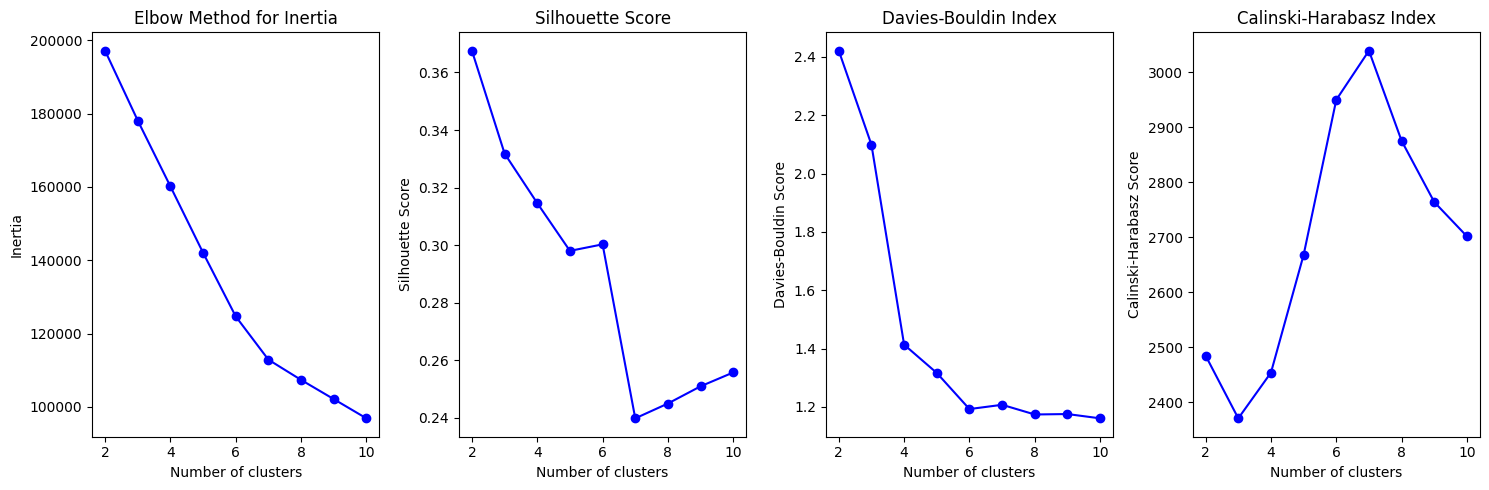

In [30]:
#This block of code contains and iteration of the various k-means cluster metrics, and plots a line curve to ilustrate the various metric scores and their asociated k-values.
# create the inertia, Silhouette, davis boudin,, and calinski variables that will hold the results of the scores following the iteration run for the various metrics
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

#iterate through a range of k-values between 2 and 11 to determine the various metrics score and append them to the various metric variables above
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(trafficSeg_X_scaled)
    labels = kmeans.labels_

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(trafficSeg_X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(trafficSeg_X_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(trafficSeg_X_scaled, labels))

# Plot the metrics
plt.figure(figsize=(15, 5))
#Inertia plot
plt.subplot(1, 4, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Inertia')
#Silhouette score plot
plt.subplot(1, 4, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
#Davies Bouldin Scores Plot
plt.subplot(1, 4, 3)
plt.plot(K, davies_bouldin_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index')
#Calinski-Harabasz Scores plot
plt.subplot(1, 4, 4)
plt.plot(K, calinski_harabasz_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

**Elbow Method for Inertia:**
This metric helps us identify the point at which the the rate of decrease in inertia scores sharply dslows down. we can see from the plot that this point is at k= 6 indicating that according to the inertia score, 6 is an optimal value for K. However we cannot depend on this alone at face value as we know that lower inertial scores stands the risk of over fitting since this will mean that our datapoints are very close to the centroid of each cluster.

**Silhouette Score:**
This metric helps us identify the the number of clusters with the farthest inter-cluster distance for their data-points. From the plot we can see that is k=2 with an approximate silhotte score of 0.370. However we also see that k=6 has a relatively high silhouette score of approximately 0.305. The silhouette scores closest to 1 indicates that the datapoints in each cluster are farther from the centroids of the other clusters around them.

**Davies Bouldin Index:**
This metric measures the average similarity ratio for each cluster and its most similar cluster having considered both inter-cluster and intra-cluster distances. A lower score indicates that the each cluster is compact and far apart from the other clusters and from our plot we can see that k=6 has the lowest DB score of 1.6.

**Calinski-Harabasz Score:** This metric measures the ratio of the sum of between-cluster dispersion and within-cluster dispersion. The higher the CH score the better as higher scores indicate that the clusters are better defined. in the case of our plot, k= 7 appears to be the highest with CH score of over 3100. However we see that k=6 has the next highest with CH score of 3080.


Based on th efrequency of metrics score favouring k=6. hence, I will fir a 6 cluster model for our analysis.

In [31]:
# Fit a 6-cluster model.
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(trafficSeg_X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [32]:
#print the unique lebels for the clustering
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [33]:
# Create a new column `cluster`.

### YOUR CODE HERE ###
clust6_df = agg_df #Create a variable to hold the dataframe assigning the 6 cluster labels
clust6_df['6_cluster'] = kmeans6.labels_
clust6_df.head()


,id,Customer_name,age,city,country,traffic_source,instance_count,returned_count,cancelled_count,complete_count,shipped_count,processing_count,returned_price_total,cancelled_price_total,completed_price_total,shipped_price_total,processing_price_total,region,gender_M,6_cluster
0,2,Justin Clay,18,Berkley,United States,Search,3,3,0,0,0,0,147.0,0.0,0.0,0.0,0.0,North America,True,4
1,3,Mary Carroll,41,Shijiazhuang,China,Search,5,0,1,2,2,0,0.0,94.0,177.5,139.0,0.0,East Asia,False,3
2,4,Jose Thomas,64,Miami Beach,United States,Display,2,0,0,2,0,0,0.0,0.0,264.0,0.0,0.0,North America,True,3
3,6,Amber Wilson,20,Beaumont,United States,Organic,1,0,1,0,0,0,0.0,39.5,0.0,0.0,0.0,North America,False,0
4,7,Katherine Reilly,16,Bon-y-maen,United Kingdom,Search,6,0,0,0,2,4,0.0,0.0,0.0,222.0,238.0,Europe,False,5


In [34]:


# Group by cluster and calculate summary statistics
cluster_summary = clust6_df.groupby('6_cluster').agg({
    'age': ['mean', 'median'],
    'instance_count': ['sum', 'mean'],
    'returned_count': ['sum', 'mean'],
    'cancelled_count': ['sum', 'mean'],
    'complete_count': ['sum', 'mean'],
    'shipped_count': ['sum', 'mean'],
    'processing_count': ['sum', 'mean'],
    'returned_price_total': ['sum', 'mean'],
    'cancelled_price_total': ['sum', 'mean'],
    'completed_price_total': ['sum', 'mean'],
    'shipped_price_total': ['sum', 'mean'],
    'processing_price_total': ['sum', 'mean']
}).reset_index()

cluster_summary

6_cluster        age        instance_count           returned_count  \
                  mean median            sum      mean            sum   
0         0  40.690662   40.0          14888  1.332975           1236   
1         1  40.821514   40.0           6667  4.006611            175   
2         2  41.383139   41.0           5159  3.535984            150   
3         3  40.808932   40.0           6597  3.729226            227   
4         4  40.871316   41.0           3573  3.509823           2488   
5         5  41.051813   42.0           5561  3.601684            160   

            cancelled_count           complete_count           shipped_count  \
       mean             sum      mean            sum      mean           sum   
0  0.110663            1803  0.161429           3922  0.351151          5256   
1  0.105168             280  0.168269            474  0.284856          5324   
2  0.102810            3599  2.466758            426  0.291981           610   
3  0.128321             259  0.146410           5060  2.860373           649   
4  2.444008             179  0.175835            290  0.284872           361   
5  0.103627             188  0.121762            486  0.314767           556   

            processing_count           returned_price_total              \
       mean              sum      mean                  sum        mean   
0  0.470588             2671  0.239144         54882.800066    4.913851   
1  3.199519              414  0.248798          9036.390011    5.430523   
2  0.418095              374  0.256340          7519.800007    5.154078   
3  0.366874              402  0.227247         10972.840028    6.202849   
4  0.354617              255  0.250491        174833.230196  171.741876   
5  0.360104             4171  2.701425          7926.740012    5.133899   

  cancelled_price_total             completed_price_total              \
                    sum        mean                   sum        mean   
0          77658.140036    6.953007         173497.260330   15.533822   
1          14429.700006    8.671695          24356.980045   14.637608   
2         240744.430136  165.006463          24583.170066   16.849328   
3          14223.880025    8.040633         356973.110364  201.793731   
4           9056.330017    8.896198          15082.940011   14.816248   
5           8839.400018    5.725000          25652.680018   16.614430   

  shipped_price_total             processing_price_total              
                  sum        mean                    sum        mean  
0       244871.740415   21.924231          124762.090160   11.170390  
1       394833.860242  237.279964           21934.280007   13.181659  
2        35416.890063   24.274770           21209.590029   14.537073  
3        35916.520026   20.303290           21808.180009   12.327971  
4        21682.670007   21.299283           14973.880002   14.709116  
5        30897.030043   20.011030          298519.920220  193.341917

We can see from the descriptive statistics for each cluster that the mean and median ages for each cluster are approximately the same at 41 years. The instance count for the 1st cluster is the highest at 14,888. The Returned count for the 5th cluster is the highest at 2,488 despite having the lowest instance count. The cancelled count is highest at 3,599 for the 3rd cluster followed by 1,803 for the 1st cluster. The completed orders count is highest in the 4th cluster at 5,060 followed by the 1st cluster at 3,922. The cluster generating the most revenue is cluster 4 with a completed price total of 356,973 USD, and the 5th cluster appears to be losing the most revenue through returned and canceled price total cumulatively as they are losing approximately 248,263 USD.

**I will use visualization to better analyze the patterns in each segment/cluster**


In [35]:
def plot_cluster_analysis(cluster_df):
    # Melt the dataframe to long format for prices
    melted_price_df = cluster_df.melt(
        id_vars=['6_cluster', 'id', 'Customer_name', 'age', 'gender_M', 'city', 'country', 'traffic_source', 'instance_count',
                 'returned_count', 'cancelled_count', 'complete_count', 'shipped_count', 'processing_count'],
        value_vars=['returned_price_total', 'cancelled_price_total', 'completed_price_total', 'shipped_price_total', 'processing_price_total'],
        var_name='Price_Type', value_name='Total_Price'
    )

    # Melt the dataframe to long format for counts
    melted_count_df = cluster_df.melt(
        id_vars=['6_cluster', 'id', 'Customer_name', 'age', 'gender_M', 'city', 'country', 'traffic_source', 'instance_count'],
        value_vars=['returned_count', 'cancelled_count', 'complete_count', 'shipped_count', 'processing_count'],
        var_name='Count_Type', value_name='Total_Count'
    )

    # Merge the melted dataframes on common columns
    merged_df = pd.merge(melted_price_df, melted_count_df,
                         on=['6_cluster', 'id', 'Customer_name', 'age', 'gender_M', 'city', 'country', 'traffic_source', 'instance_count'],
                         suffixes=('_price', '_count'))

    # Plot age distribution by cluster
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='6_cluster', y='age', data=cluster_df)
    plt.title('Age Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Age')
    plt.show()

    # Plot for counts
    plt.figure(figsize=(12, 8))
    sns.barplot(x='6_cluster', y='Total_Count', hue='Count_Type', data=melted_count_df, estimator=np.sum)
    plt.title('Total Counts by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Count')
    plt.legend(title='Count Type')
    plt.show()

    # Plot Total Price by cluster
    plt.figure(figsize=(12, 8))
    sns.barplot(x='6_cluster', y='Total_Price', hue='Price_Type', data=melted_price_df, estimator=np.sum)
    plt.title('Total Prices by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Total Price')
    plt.legend(title='Price Type')
    plt.show()

    # Plot for region (Region)
    plt.figure(figsize=(12, 8))
    sns.countplot(x='6_cluster', hue='region', data=cluster_df)
    plt.title('City Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Plot for traffic source
    plt.figure(figsize=(12, 8))
    sns.countplot(x='6_cluster', hue='traffic_source', data=cluster_df)
    plt.title('Traffic Source Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title='Traffic Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

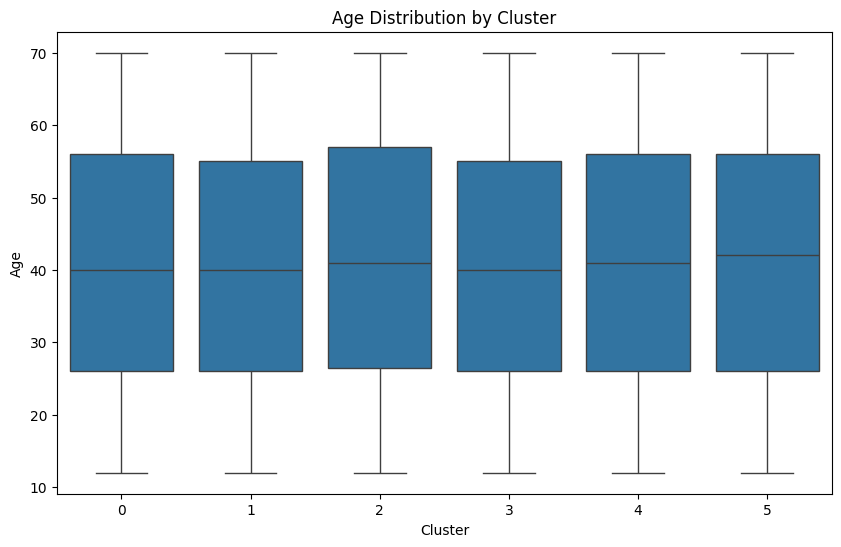

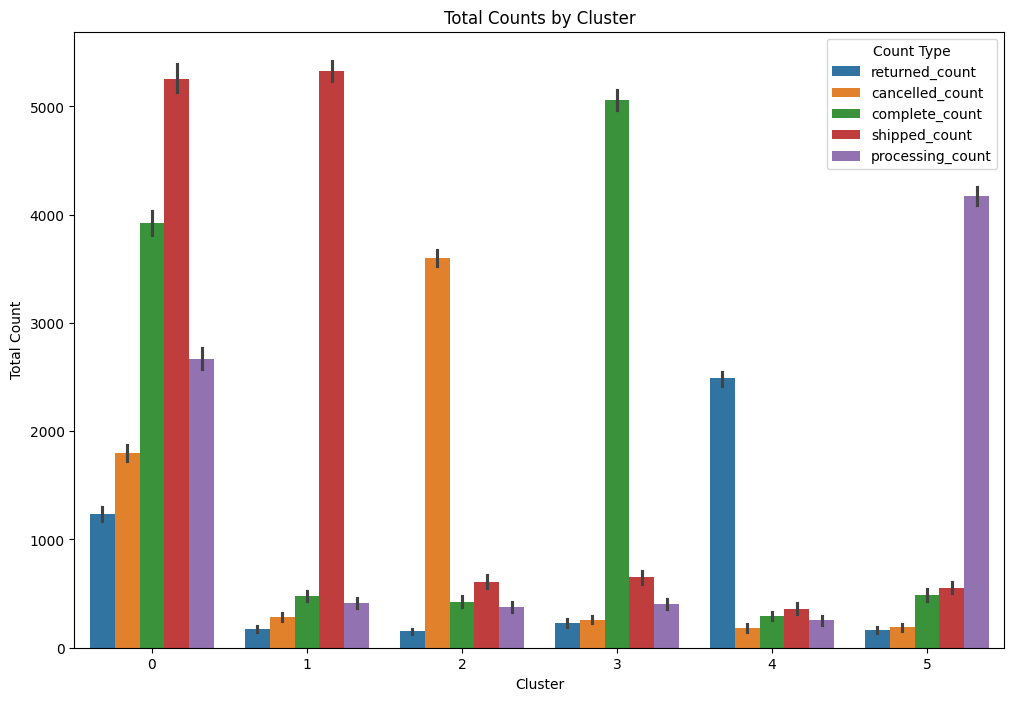

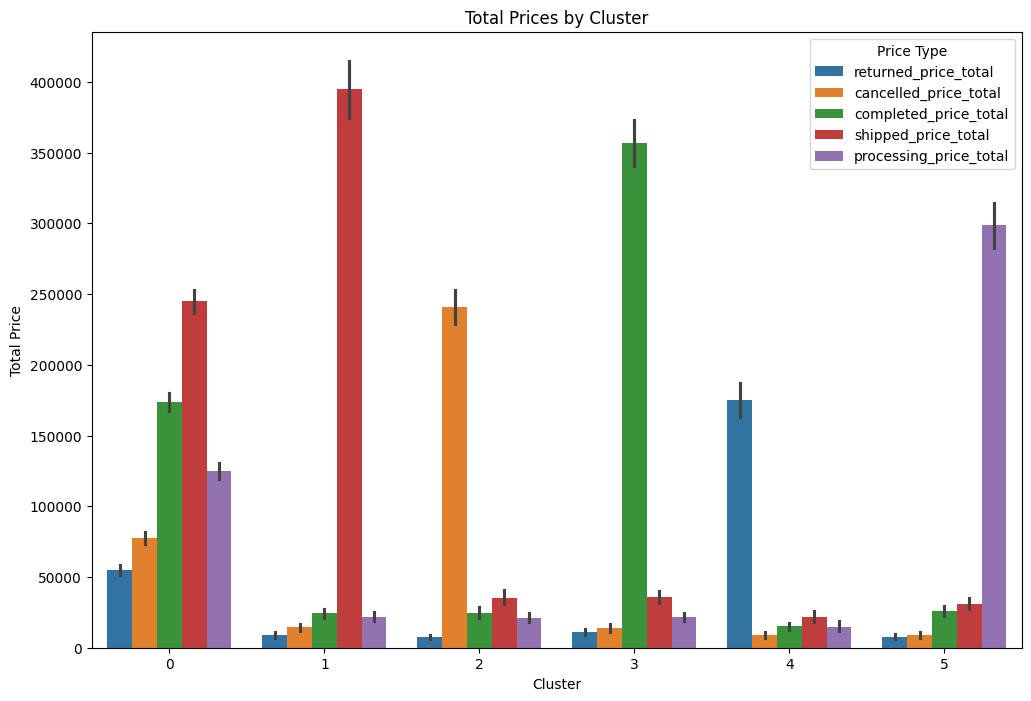

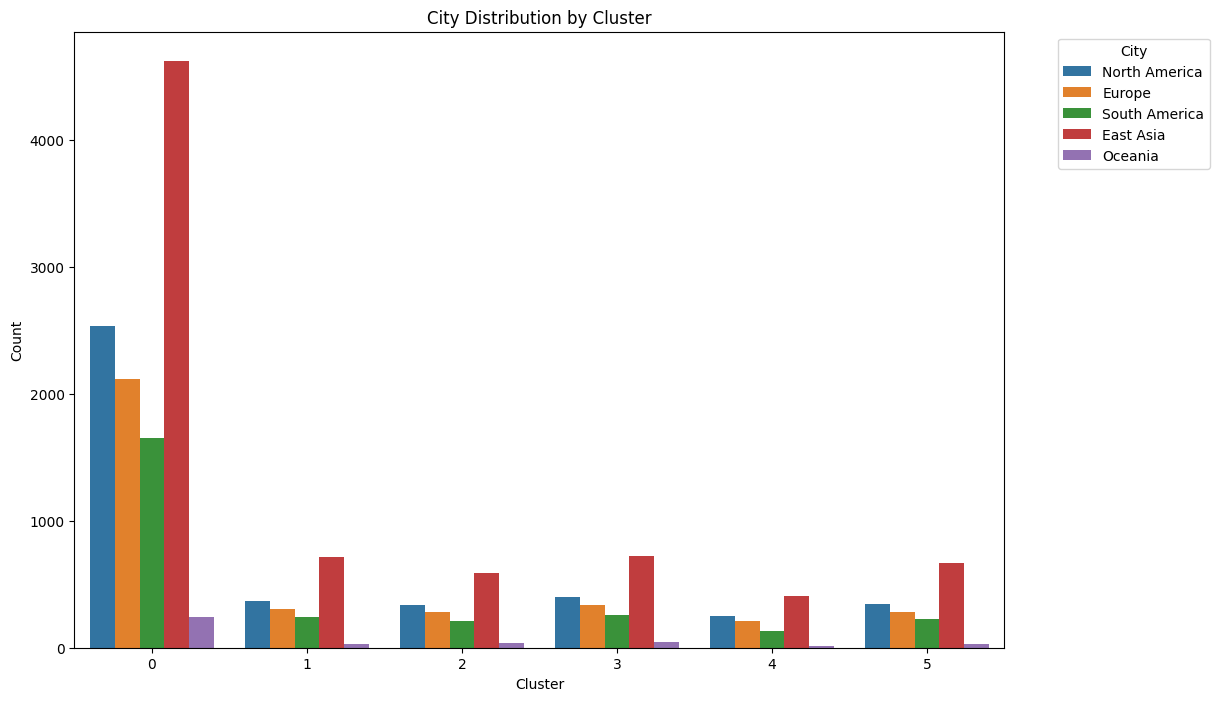

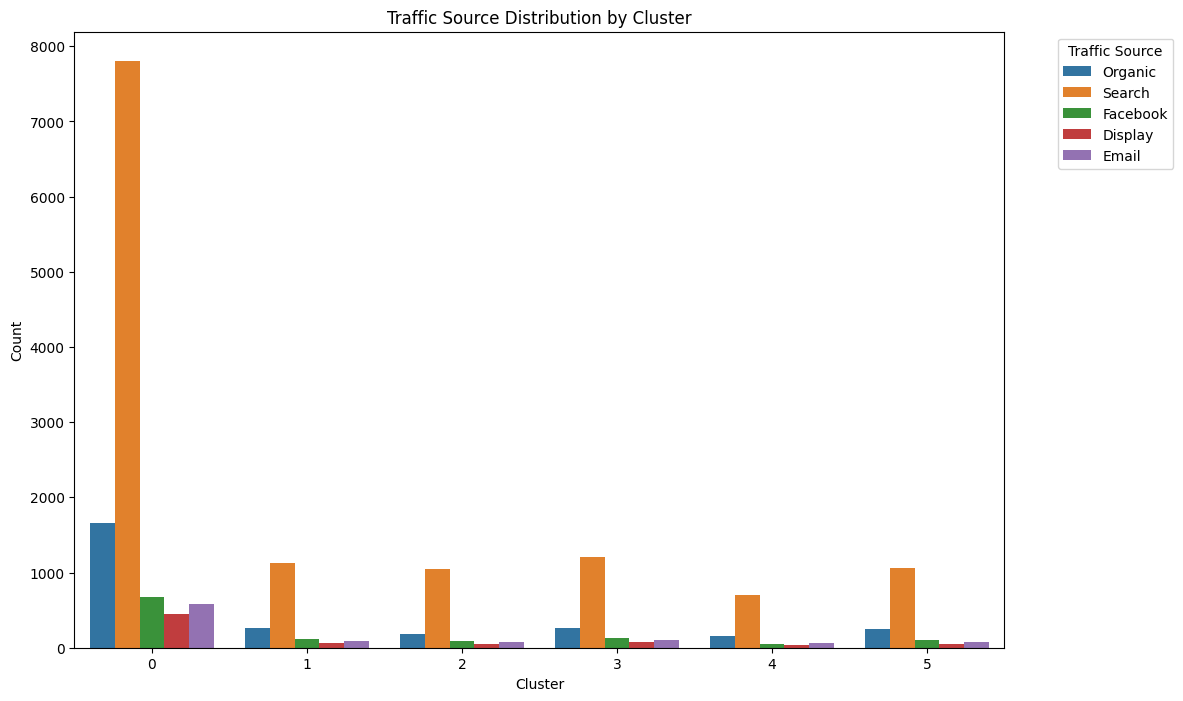

In [36]:
plot_cluster_analysis(clust6_df)


## Insights

**Age Distribution by Cluster**
The Box plot For the Age distribution shows that for all 6 clusters fall within the interquartile range of 27 to 56 years old. i.e. the central 50 percent of the data falls within this age range. We can see that the median age is around 41 and this is consistent with the mean representation of the ages. What this implies for the business is that they can apply age-appropriate promotions and marketing strategies and campaigns for this age range, and most will be largely similar across the 6 segments.

**Total Counts by Cluster**
This checks the total order counts for each cluster and illustrates the various distributions of these counts according to returned, canceled, compete, shipped, and processing count type per cluster. We can see here that as stated earlier, the 4th cluster has the highest amount of completed orders by count compared to other clusters, followed by the 1st cluster. However, we see that the returned and canceled count for the 4th cluster is significantly low compared to those of the 1st cluster. The 6th cluster has the highest number of orders in processing and this requires a deep check as to why this is the case. Could it be technical or manpower issues at the processing plant or business unit? The 5th cluster has the highest amount of returned orders and this should cause us to want to know why. Questions around the quality of products sent, details and accuracy of product description, and quality/accuracy of marketing communication for products should be assessed and addressed. The 3rd cluster has the most cancelled orders and the business should be reviewing if issues like customer service and value delivery may be causing this. Overall we can assume that the 1st cluster appears to be the most optimal in terms of total order counts as it has the highest shipped count, the second highest complete count, and the second highest processing count.
This is a plus for the 4th cluster but doesn’t necessarily translate to more revenue, as the price of orders may be lower in this cluster compared to other clusters.

**Total Prices by Cluster**
This plot checks the total prices per cluster and it illustrates the distribution of these prices according to returned, canceled, complete, shipped, and processing price total for each cluster. We can deduce that contrary to our assertion that the cluster with the highest completed count may not be necessarily the highest revenue-generating cluster, our 4th cluster also generates the highest revenue as it has the highest completed price total. This indicates that the prices per order were relatively high compared to those in order clusters. We see from our descriptive statistics that the mean completed price is 8 USD. Although not the highest mean price, it is close to the mean completed price for other clusters except the 3rd cluster with 165 USD (the is the highest mean completed price). The cluster with the most shipped price total is the 2nd cluster, followed by the 1st cluster. The implication of this is that at face value they are likely to be seen as the most optimal cluster as they have the highest potential for realizable revenue. This position corroborates our earlier insight based on the deduction that the 1st and 2nd clusters have the highest potential optimality due to their high shipped count. Optimality in this case is seen as how efficient the business is in terms of activities up to shipped status and the potentially realizable revenue from these activities considering that orders could still be returned. The implication of this for the business is that They can identify which cluster is less susceptible to cancellations,  and which ones have the most cancelations. This is necessary for the business to review and address issues with product offerings for the affected clusters with minimal optimality, review orders processing to determine what are the likely causes of loss of revenue in orders processing, and also target the optimal clusters with customer retention strategies for these high performing clusters.

**Region Distribution by Cluster**
From the plot, we can see that the 1st cluster has the highest density for orders according to region.  We can see that the 1st Custer has the highest amount of orders according to instance count, totaling 14,888, and of this, the cluster has the highest distribution according to region, with East Asia having the highest number of orders, followed by North America and then South America. This ranking trend is similar for all clusters and the implication of this is that in comparison to order counts, the effect of order cancelation is more significant for other clusters than for the 1st cluster. This is not to say that the cancelation rate for the 1st cluster is acceptable.

**Traffic Source Distribution by Cluster**
From this plot we can see that orders placed through search are more than those placed through other sources for all clusters, followed by those placed through organic engagements. The implication of this for the business is; that their Search engine optimization is likely performing better than other reach campaigns, and they may consider optimizing other sources rather than dropping investment in other sources of reach/engagement all together. The business can also in a situation of cost management consider retaining and optimizing Facebook and email campaigns for the 1st cluster as there is a sizeable amount of engagement from these sources in this cluster.


## General Business Insights
**Geographic Targeting:** Tailor marketing strategies to different geographic regions based on the distribution observed in the clusters.
**Traffic Source Analysis:** Invest in improving traffic sources that yield high-value customers, such as search and organic traffic.
**Product Improvement:** Identify and address common issues in returned and cancelled orders to improve product quality and customer satisfaction.
**Age-Based Marketing:** Although the age distribution is consistent, consider age-appropriate marketing messages and channels to better engage with customers.

